### Fill in your name, student id number and email address
#### name: Lauri Pelin
#### student id: 512478
#### email: Lajpel@utu.fi

## Data analysis and knowledge discovery - Exercise 3: Unsupervised learning

This is the template for the third exercise. The purpose of this exercise is to familiarize yourself with the basics of unsupervised learning by using the agglomerative hierarchical clustering and k-means clustering algorithms to find patterns.

The data set utilised in this exercise is a simplified and downsampled version of a knowledge discovery and data mining competition data set. The data will be available on the course's Moodle page. For those who are interested, the original data can be found at https://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html. However, please make sure to **use the version on Moodle** as `ex3_network_data.csv`. The data is described below.

The data set contains samples of network activity simulated in a military network environment. There are different types of malicious activity, and also activity that is considered normal. It is **not necessary** to understand the details of the data set in order to complete the exercise.

In addition to normal activity, there are 3 types of malicious activity - denial of service, unauthorized remote login, and network probing (e.g. port scanning) - simulated in a military network environment. There are 500 samples of each class. There are 6 numeric features, described below:

`src_bytes`: number of bytes from source to destination\
`dst_bytes`: number of bytes from destination to source\
`duration`: length of connection (seconds)\
`count`: number of connections to the same host as the current connection in the past two seconds\
`serror_rate`: percentage of connections that have SYN errors\
`rerror_rate`: percentage of connections that have REJ errors

In real applications, visualizing and cleaning the data are important steps. However, in this exercise you can treat the data as given, and focus on the unsupervised methods.

Please consider the following things when returning your notebook:

 - As in the two previous exercises, the grading scale is failed/passed/passed with honors.
 
 - For a passing grade each part of the exercise, except for the BONUS, must be completed, and all questions should be answered. Some mistakes are allowed as long as you clearly attempt to solve all the exercises.
 
 - For doing both the exercise and the optional bonus task sufficiently well, you will be awarded one bonus point for the exam.
 
 - All the cells in the finished notebook should run without crashing. Please delete unnecessary cells. As a good rule of thumb, use "Restart and run all" on the finished notebook to make sure it runs without errors and produces the expected output.

 - Remember to comment your code to explain how it works and what you intend for it to do.
 
 - Answer the questions asked in the assignments in Markdown cells.
 
 - If you are having problems with this exercise, try an online search first, but don't just copy-paste any code you find. See exercise guidelines in the Moodle page of this course. If you can't find a solution to your problem, ask for advice in the course discussion forum on Moodle or contact oskari.s.heikkinen@utu.fi.
 
 - If/when you look things up during this exercise, please cite your sources (e.g. a link to a web page). It's better to cite too much than too little.

### Library imports, Jupyter Notebook settings etc.

The below libraries are sufficient to complete the exercise. You can import additional functionality here if you want.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from scipy.cluster.hierarchy import linkage, dendrogram

%matplotlib inline

### Read the data

- Download the exercise 3 data on the Moodle page of this course.
- Read the data into a Pandas dataframe.
- Display a few rows and some basic information to make sure the data was loaded correctly

In [2]:
# Path for the data
data_path = 'ex3_network_data.csv'

# Create a dataframe
network_data = pd.read_csv(data_path)

#Check the dataframe
network_data.head(10)

,src_bytes,dst_bytes,duration,count,serror_rate,rerror_rate,class
0,0,0,0,223,1.0,0.0,denial_of_service
1,1032,0,0,511,0.0,0.0,denial_of_service
2,520,0,0,511,0.0,0.0,denial_of_service
3,1032,0,0,510,0.0,0.0,denial_of_service
4,520,0,0,448,0.0,0.0,denial_of_service
5,1032,0,0,511,0.0,0.0,denial_of_service
6,520,0,0,452,0.0,0.0,denial_of_service
7,1032,0,0,511,0.0,0.0,denial_of_service
8,1032,0,0,511,0.0,0.0,denial_of_service
9,520,0,0,439,0.0,0.0,denial_of_service


### Part 1: Preprocess and visualize the data

 - Perform z-score standardization on the features to ensure that all features have the same scale.
 
 - Project the data to two dimensions by using principal component analysis (PCA) and visualize the resulting two-dimensional data in a scatter plot. Don't color the scatter plot yet.
 
 - Does it look like there are clear clusters? Don't worry if they're hard to see.

[0.28965747 0.21293693]
[58.9566764  50.54941282]
           PC1       PC2
0    -0.784767 -2.372303
1     2.056440 -1.222154
2     1.306228 -1.295604
3     2.053927 -1.219385
4     1.147854 -1.121159
...        ...       ...
1995  1.698297  2.253958
1996  1.703686  2.255636
1997  1.718101  2.257278
1998 -0.374820  0.074500
1999 -0.245877  0.087124

[2000 rows x 2 columns]


[Text(0.5, 1.0, 'PCA of network data')]

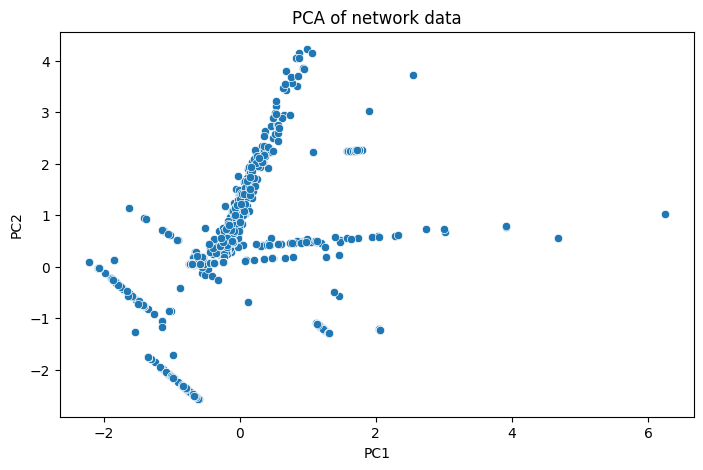

In [3]:
import seaborn as sns
#Target variable
labels = network_data['class']
y=labels

#Features 
features= network_data.loc[:, network_data.columns != 'class'] 
x=features
#print(x)
#print(y)

#Scaling the features
sc_x = StandardScaler()
X = sc_x.fit_transform(x)
#print(X)

#PCA
pca = PCA(n_components=2)
pca.fit_transform(X)
pca_trans=pca.fit_transform(X)
pca_dataframe=pd.DataFrame(pca_trans, columns=['PC1', 'PC2'])
pca_var=pca.explained_variance_ratio_
pca_sin=pca.singular_values_
print(pca.explained_variance_ratio_)
print(pca.singular_values_)
print(pca_dataframe)

#Scatterplot
fig, ax = plt.subplots(1,2, figsize=(18,5))
# Visualizing the resulting 2-dimensional data in a scatter plot
sns.scatterplot(x=pca_dataframe['PC1'], y=pca_dataframe['PC2'], ax=ax[0])
for v in range(1, 2):
    fig.delaxes(ax[v])
ax[0].set(title='PCA of network data')    

### <font color = red>There seems to be some groups but some of them are a bit harder to distinguish than others.  </font> 

Because clustering is an unsupervised learning method, the `class` column is completely unnecessary for most of these tasks. You will only need the `class` column in **Part 4**, where it's used to compute a performance metric and to visually compare clustering results to the classes.

### Part 2a: Agglomerative hierarchical clustering
 
 - Cluster the data into 4 clusters using agglomerative hierarchical clustering. Try different values for the "linkage" parameter.
 
 - Use the z-score standardized 6-dimensional data for clustering - not the principal components!
 
 - What is the significance of the linkage criterion in a hierarchical clustering algorithm?
 
 - Evaluate the clustering performance for each linkage criterion using a metric called "silhouette score".
 
 - What does silhouette score quantify and how is it computed?

In [4]:
#single linkage
single_cluster=AgglomerativeClustering(n_clusters=4, linkage='single') #{‘ward’, ‘complete’, ‘average’, ‘single’}
single_pred=single_cluster.fit_predict(X) #Z-score standardized features were saved as uppercase X which didn't include the class column
#"silhouette score".
single_scores=silhouette_score(X, single_pred)
print("Single linkage Silhouette score:",single_scores)
print("The closer the Silhouette score is to 1 the better.")
print('--------------------------------------------')

#ward linkage
ward_cluster=AgglomerativeClustering(n_clusters=4, linkage='ward') #{‘ward’, ‘complete’, ‘average’, ‘single’}
ward_pred=ward_cluster.fit_predict(X) #Z-score standardized features were saved as X
#"silhouette score".
ward_scores=silhouette_score(X, ward_pred)
print("Ward linkage Silhouette score:",ward_scores)
print("The closer the Silhouette score is to 1 the better.")
print('--------------------------------------------')

#complete linkage
complete_cluster=AgglomerativeClustering(n_clusters=4, linkage='complete') #{‘ward’, ‘complete’, ‘average’, ‘single’}
complete_pred=complete_cluster.fit_predict(X) #Z-score standardized features were saved as X
#"silhouette score".
complete_scores=silhouette_score(X, complete_pred)
print("Complete linkage Silhouette score:",complete_scores)
print("The closer the Silhouette score is to 1 the better.")
print('--------------------------------------------')

#average linkage
average_cluster=AgglomerativeClustering(n_clusters=4, linkage='average') #{‘ward’, ‘complete’, ‘average’, ‘single’}
average_pred=average_cluster.fit_predict(X) #Z-score standardized features were saved as X
#"silhouette score".
average_scores=silhouette_score(X, average_pred)
print("Average linkage Silhouette score:",average_scores)
print("The closer the Silhouette score is to 1 the better.")
print('--------------------------------------------')

Single linkage Silhouette score: 0.7288757664397134
The closer the Silhouette score is to 1 the better.
--------------------------------------------
Ward linkage Silhouette score: 0.6299185426636938
The closer the Silhouette score is to 1 the better.
--------------------------------------------
Complete linkage Silhouette score: 0.48157598037192545
The closer the Silhouette score is to 1 the better.
--------------------------------------------
Average linkage Silhouette score: 0.6241907400676748
The closer the Silhouette score is to 1 the better.
--------------------------------------------


### <font color = red> According to https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html "The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion."   

### <font color = red> In essence the linkage criterion signifies a method for finding suitable clusters in given data. 
</font> 
    
### <font color = red> According to https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html Silhouette score means silhouette coefficient which "..is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of. Note that Silhouette Coefficient is only defined if number of labels is 2 <= n_labels <= n_samples - 1." </font> 

### Part 2b: Dendrograms

 - Plot dendrograms to visualize the merging processes.
 - For this you will need a linkage matrix. Hint: while you can extract one from a fitted AgglomerativeClustering object, it is much easier to use the scipy implementation (scipy.cluster.hierarchy.linkage).
 - Compute the linkage matrix using both `average` and `complete` linkage, and plot the dendrograms using scipy.cluster.hierarchy.dendrogram).
 - Truncate the dendrogram so that three levels of the dendrogram tree are visible for better readability.
 - How do you interpret the dendrograms? How do they differ?

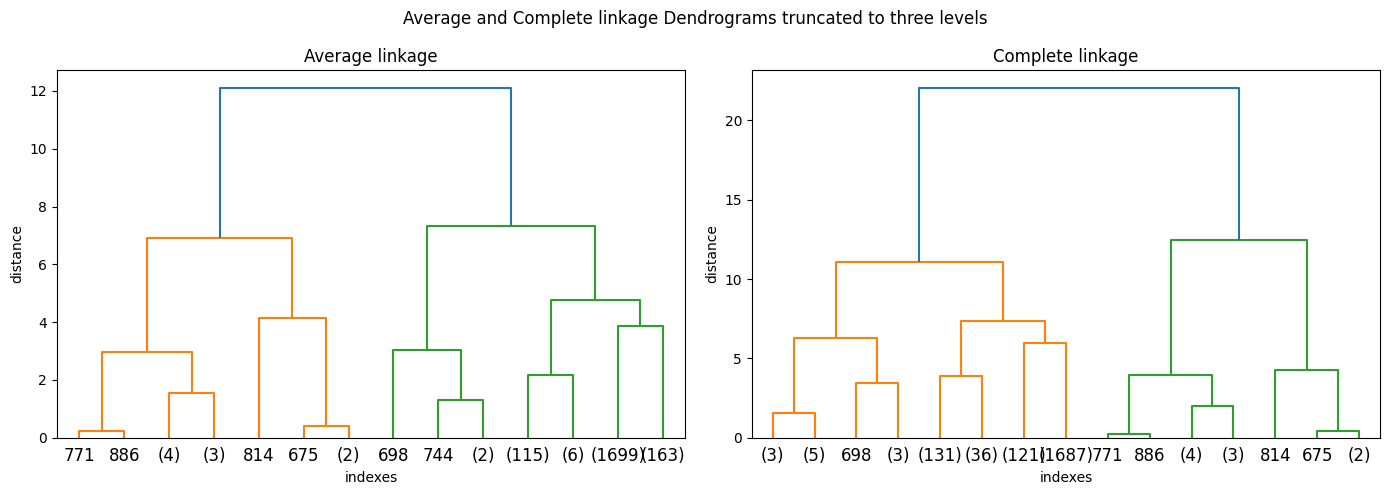

In [5]:
#linkage matrixes and dendrogram using scipy.linkage

#average
average_Z = linkage(X, 'average')
#dendrogram(average_Z, truncate_mode='level',p=3)

#complete
complete_Z = linkage(X, 'complete')
#dn2 = dendrogram(complete_Z, truncate_mode='level',p=3)


#plot
fig, ax = plt.subplots(1,2, figsize=(14,5))
dendrogram(average_Z, ax=ax[0],truncate_mode='level',p=3) #truncating dendrogram levels with truncate_mode and p
dendrogram(complete_Z, ax=ax[1],truncate_mode='level',p=3)
fig.suptitle("Average and Complete linkage Dendrograms truncated to three levels")
ax[0].set(title="Average linkage",xlabel="indexes",ylabel='distance')
ax[1].set(title="Complete linkage",xlabel="indexes",ylabel='distance')
fig.tight_layout()

### <font color = red> As seen on the figure above the linkage dendrograms are quite a bit different from each other. For instance the distance is noticeably larger on complete linkage dendrogram. This could be due to the fact that the Complete linkage emphasizes the maximum distances between clusters whereas single linkage empasizes the minimum distances.

### Part 3: _k_-means clustering

 - Perform _k_-means clustering on the data. Use 4 clusters.
 - Evaluate the clustering performance using silhouette score.
 - Experiment with some other numbers of clusters. Does the data fit better into a different number of clusters according to silhouette score?

Silhouette score for k-means clustering with n=4 0.634040977469723
--------------------------------------------
--------------------------------------------
--------------------------------------------


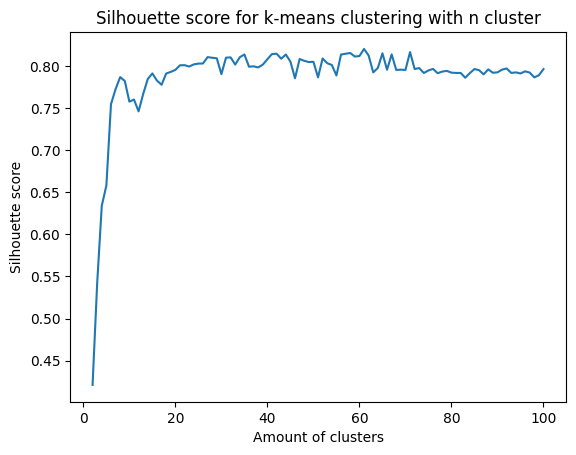

The highest silhouette score was 0.8205250209225579 with n value of 59


In [6]:
#Four clusters
kmeans = KMeans(n_clusters=4, random_state=0).fit(X) # four clusters using our standardized features
kmeans_four_pred = kmeans.predict(X)
kmeans_four_scores=silhouette_score(X, kmeans_four_pred)
print("Silhouette score for k-means clustering with n=4", kmeans_four_scores)
print('--------------------------------------------')
print('--------------------------------------------')
print('--------------------------------------------')



#Experiment with some other numbers of clusters
#Loop for 2<n<101
accuracy=[]
n_range=list(range(2, 101)) #amount of clusters has to be >2
for i in n_range:
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
    kmeans_pred = kmeans.predict(X)
    kmeans_scores=silhouette_score(X, kmeans_pred)
    accuracy.append(kmeans_scores)
    #print(("Silhouette score for k-means clustering with n=",i, kmeans_scores)) #checking the scores
    #print('--------------------------------------------')

#print(accuracy) #checking the accuracies

plt.plot(n_range, accuracy)
plt.xlabel('Amount of clusters')
plt.ylabel('Silhouette score')
plt.title("Silhouette score for k-means clustering with n cluster")
plt.show()


greatest_accuracy=max(accuracy) #highest value accuracy
n_value_greatest=accuracy.index(greatest_accuracy)
print("The highest silhouette score was",greatest_accuracy,'with n value of', n_value_greatest)


### <font color = red> As seen on the figure above the highest silhouette score was ~ 0.82 and it was achieved with n=59

#### Rand score briefly described

Rand score is a measure of similarity between two partitions of a set of elements - in this case true classes and clusters found by the clustering algorithm - and it is one of the most frequently used performance metrics for clustering. It is computed by considering each pair of elements in the dataset and counting pairs of elements as follows:
 
         a: number of pairs such that the elements are in the same class and in the same cluster
         b: number of pairs such that the elements are in different classes and in different clusters
         c: number of pairs such that the elements are in the same class but in different clusters
         d: number of pairs such that the elements are in different classes but in the same cluster
     
     Given a, b, c, d, the formula for rand index is:
     
         rand_index = (a+b)/(a+b+c+d).
     
"Adjusted Rand index" is corrected for chance by using maximum and expected values of Rand index.

        adj_rand_index = (rand_index - expected_rand_index) / (max_rand_index - expected_rand_index)

###  Part 4a: Compare the clusters with the true labels (hierarchical clustering)
 
 - Cluster the data into 4 clusters using agglomerative hierarchical clustering.
 - Choose the linkage criterion that had the best silhouette score performance in Part 2a.
 - Visualize the data again using PCA, this time coloring the scatter plot based on the true class labels. Visually compare the two scatter plots: how well do the clusters found by the clustering algorithm match the true classes? Place the two scatter plots so that they can easily be compared (e.g. in subplots next to each other in the same figure).
 - For an objective evaluation of the clustering, compute the adjusted Rand score (use the scikit-learn implementation) using the true labels and the labels predicted by clustering algorithm. How do you interpret the result?
 - If the results seem unimpressive, don't get discouraged - clustering "real life" data sets to match classes is a difficult task, and a low Rand score does not necessarily mean that you have made a mistake.

Single linkage Silhouette score: 0.7288757664397134
The closer the Silhouette score is to 1 the better.
--------------------------------------------


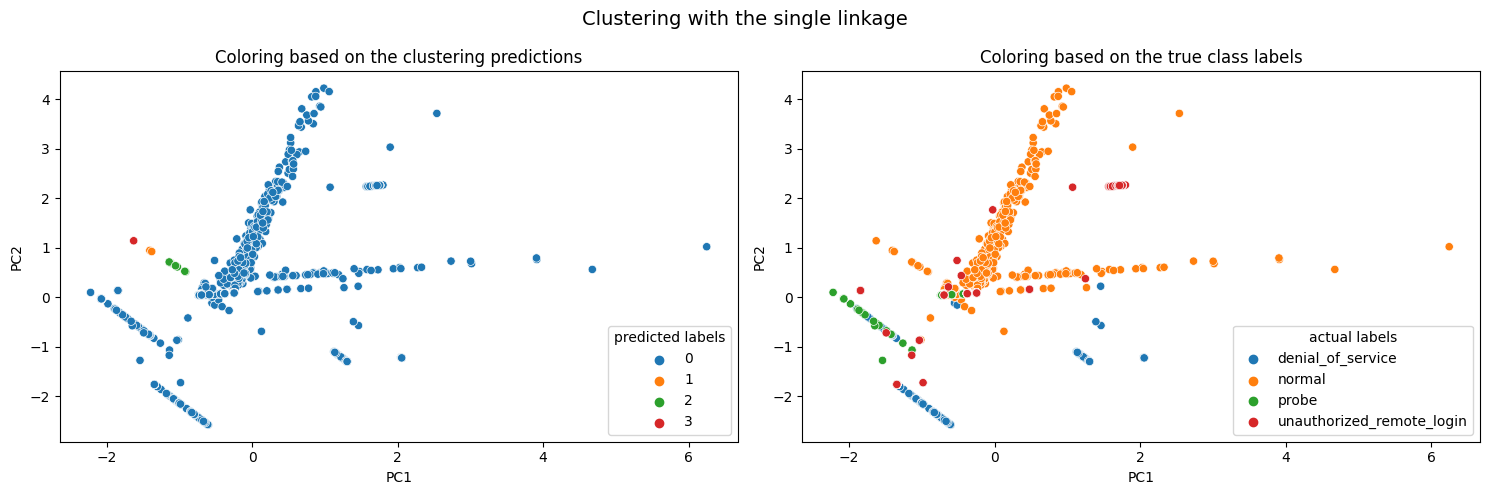

Adjusted rand score: 0.00011807828578910034


In [7]:
# Single linkage had the highest score in part 2 with a Silhouette score of: 0.7288757664397134

#single linkage
single_cluster=AgglomerativeClustering(n_clusters=4, linkage='single') 
single_pred=single_cluster.fit_predict(X) #Z-score standardized features were saved as uppercase X which didn't include the class column
#"silhouette score".
single_scores=silhouette_score(X, single_pred)
print("Single linkage Silhouette score:",single_scores)
print("The closer the Silhouette score is to 1 the better.")
print('--------------------------------------------')


#single linkage for PCA
single_clusterPCA=AgglomerativeClustering(n_clusters=4, linkage='single').fit(X)
princ_comps = PCA(2).fit_transform(X)

pca_dataframe2 = pd.DataFrame(princ_comps, columns=['PC1', 'PC2'])

pca_dataframe2['single'] = pd.Categorical(single_clusterPCA.labels_)
#display(pca_dataframe2[:7]) 


#PCA comparisons
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.scatterplot(data=pca_dataframe2, x='PC1', y='PC2', hue='single', ax=ax[0]) # cluster pred
sns.scatterplot(data=pca_dataframe2, x='PC1', y='PC2', hue=labels, ax=ax[1]) #actual


fig.suptitle('Clustering with the single linkage', size=14)
ax[0].set_title('Coloring based on the clustering predictions')
ax[1].set_title('Coloring based on the true class labels')
ax[0].legend(loc='lower right', title='predicted labels')
ax[1].legend(loc='lower right', title='actual labels')
fig.tight_layout() 
plt.show()
# Two scatter shen wtf

print('Adjusted rand score:', adjusted_rand_score(labels, single_clusterPCA.labels_))

### <font color = red> The clustering seems quite random with single linkage and overall not very precise when compared to the actual class labels. Adjusted rand score is also frankly put quite bad (0=completely random).

### Part 4b: Compare the clusters with true labels (_k_-means clustering)

 - Repeat the above steps, but this time using _k_-means clustering instead of hierarchical clustering.
 - Which performs better according to the adjusted Rand score?

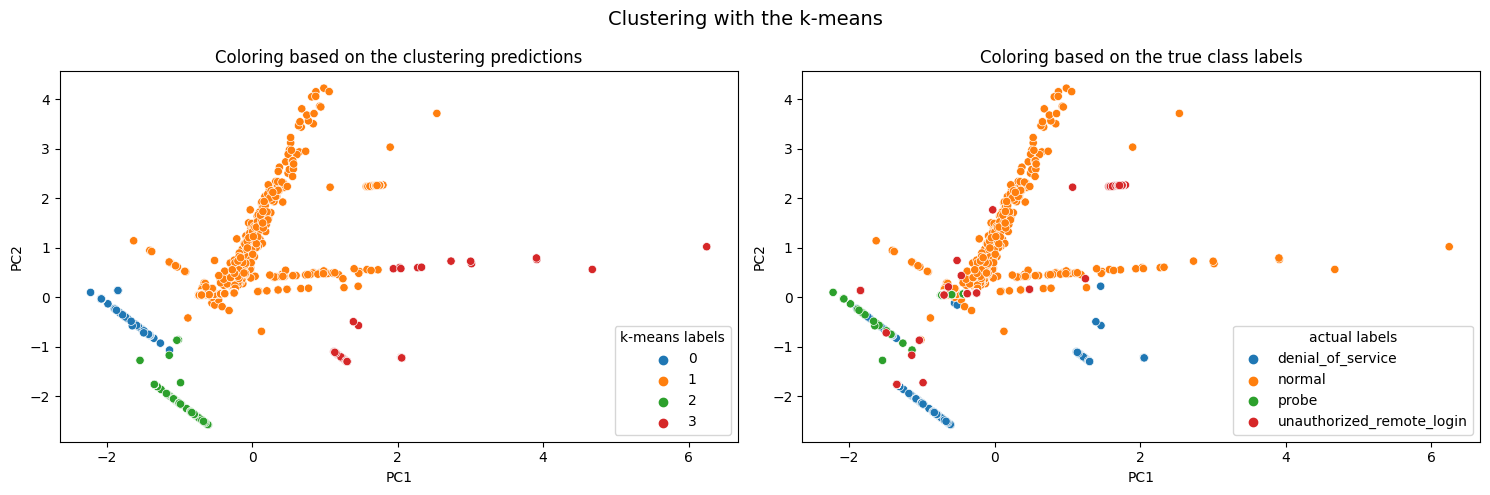

Adjusted rand score: 0.2951546107072655


In [8]:


#k-means clustering with n=4
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
princ_comps = PCA(2).fit_transform(X)

pca_dataframe2 = pd.DataFrame(princ_comps, columns=['PC1', 'PC2'])

pca_dataframe2['kmeans'] = pd.Categorical(kmeans.labels_)
#display(pca_dataframe2[:7])


#PCA comparisons
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.scatterplot(data=pca_dataframe2, x='PC1', y='PC2', hue='kmeans', ax=ax[0]) # cluster colored
sns.scatterplot(data=pca_dataframe2, x='PC1', y='PC2', hue=labels, ax=ax[1])


fig.suptitle('Clustering with the k-means', size=14)
ax[0].set_title('Coloring based on the clustering predictions')
ax[1].set_title('Coloring based on the true class labels')
ax[0].legend(loc='lower right', title='k-means labels')
ax[1].legend(loc='lower right', title='actual labels')
fig.tight_layout() 
plt.show()


print('Adjusted rand score:', adjusted_rand_score(labels, kmeans.labels_))

### <font color = red> The k-means clustering seems to fare rather decently compared to single linkage. K-means does appear to have some flaws, as it seems to have difficulties clustering denial_of_service and unauthorized_remote_logins correctly when compared to the actual class labels. Adjusted rand score is significantly better (0.2951) but still leaves a lot to be desired.

### Part 5 (optional BONUS task): Clustering unlabeled data

In this task, you are working with data where the classes are not available, given as `ex3_seeds_data_BONUS.csv` on Moodle. [The original data set](https://archive.ics.uci.edu/ml/datasets/seeds) is available for for those who are interested, but **use the slightly modified data on Moodle** instead.

In general this is a very challenging and open-ended type of task that requires in-depth domain knowledge for meaningful results. Note, however, that in this exercise you are **not required** to research the domain in question (e.g. properties of different varieties of wheat). You might need to search for more information related to clustering in order to complete this exercise.

Some of the questions are open-ended and have no correct answer. It's enough to clearly show that you thought about the questions.

 - As in Part 1, z-score standardize the data, project it to 2 dimensions using PCA and visualize the result in a scatter plot.
 - Does the scatter plot look like the data might have a clustered structure? How many clusters do you see?
 - Decide, based on what you've learned about silhouette score and Rand score, which performance metric you should use in this task. Justify your choice.
 - Get an objective evaluation of how many clusters the data most likely has by using your chosen performance metric. Try both _k_-means clustering and agglomerative hierarchical clustering with different linkage criterions and see which performs best.
 - Visualize (with color) the best-performing result in the PCA scatter plot you created earlier.